# Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and understand the data

In [2]:
# import the input data
df = pd.read_csv("/content/drive/MyDrive/day.csv")

In [3]:
# viewing the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#columns in the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# viewing the null values and type of columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Preprocessing


### Dropping unwanted columns

The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. The 'instant' column is just a record index. These columns doesn't help in prediction so we will remove 'casual', 'instant' and 'registered'

In [6]:
# dropping 'dteday' as it is an object and we already have the info about the month data and also removing 'yr' column as it doesn't add any value
data=df.drop(['instant','casual','registered','dteday'],axis=1)

In [7]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Data visualization of numerical variables

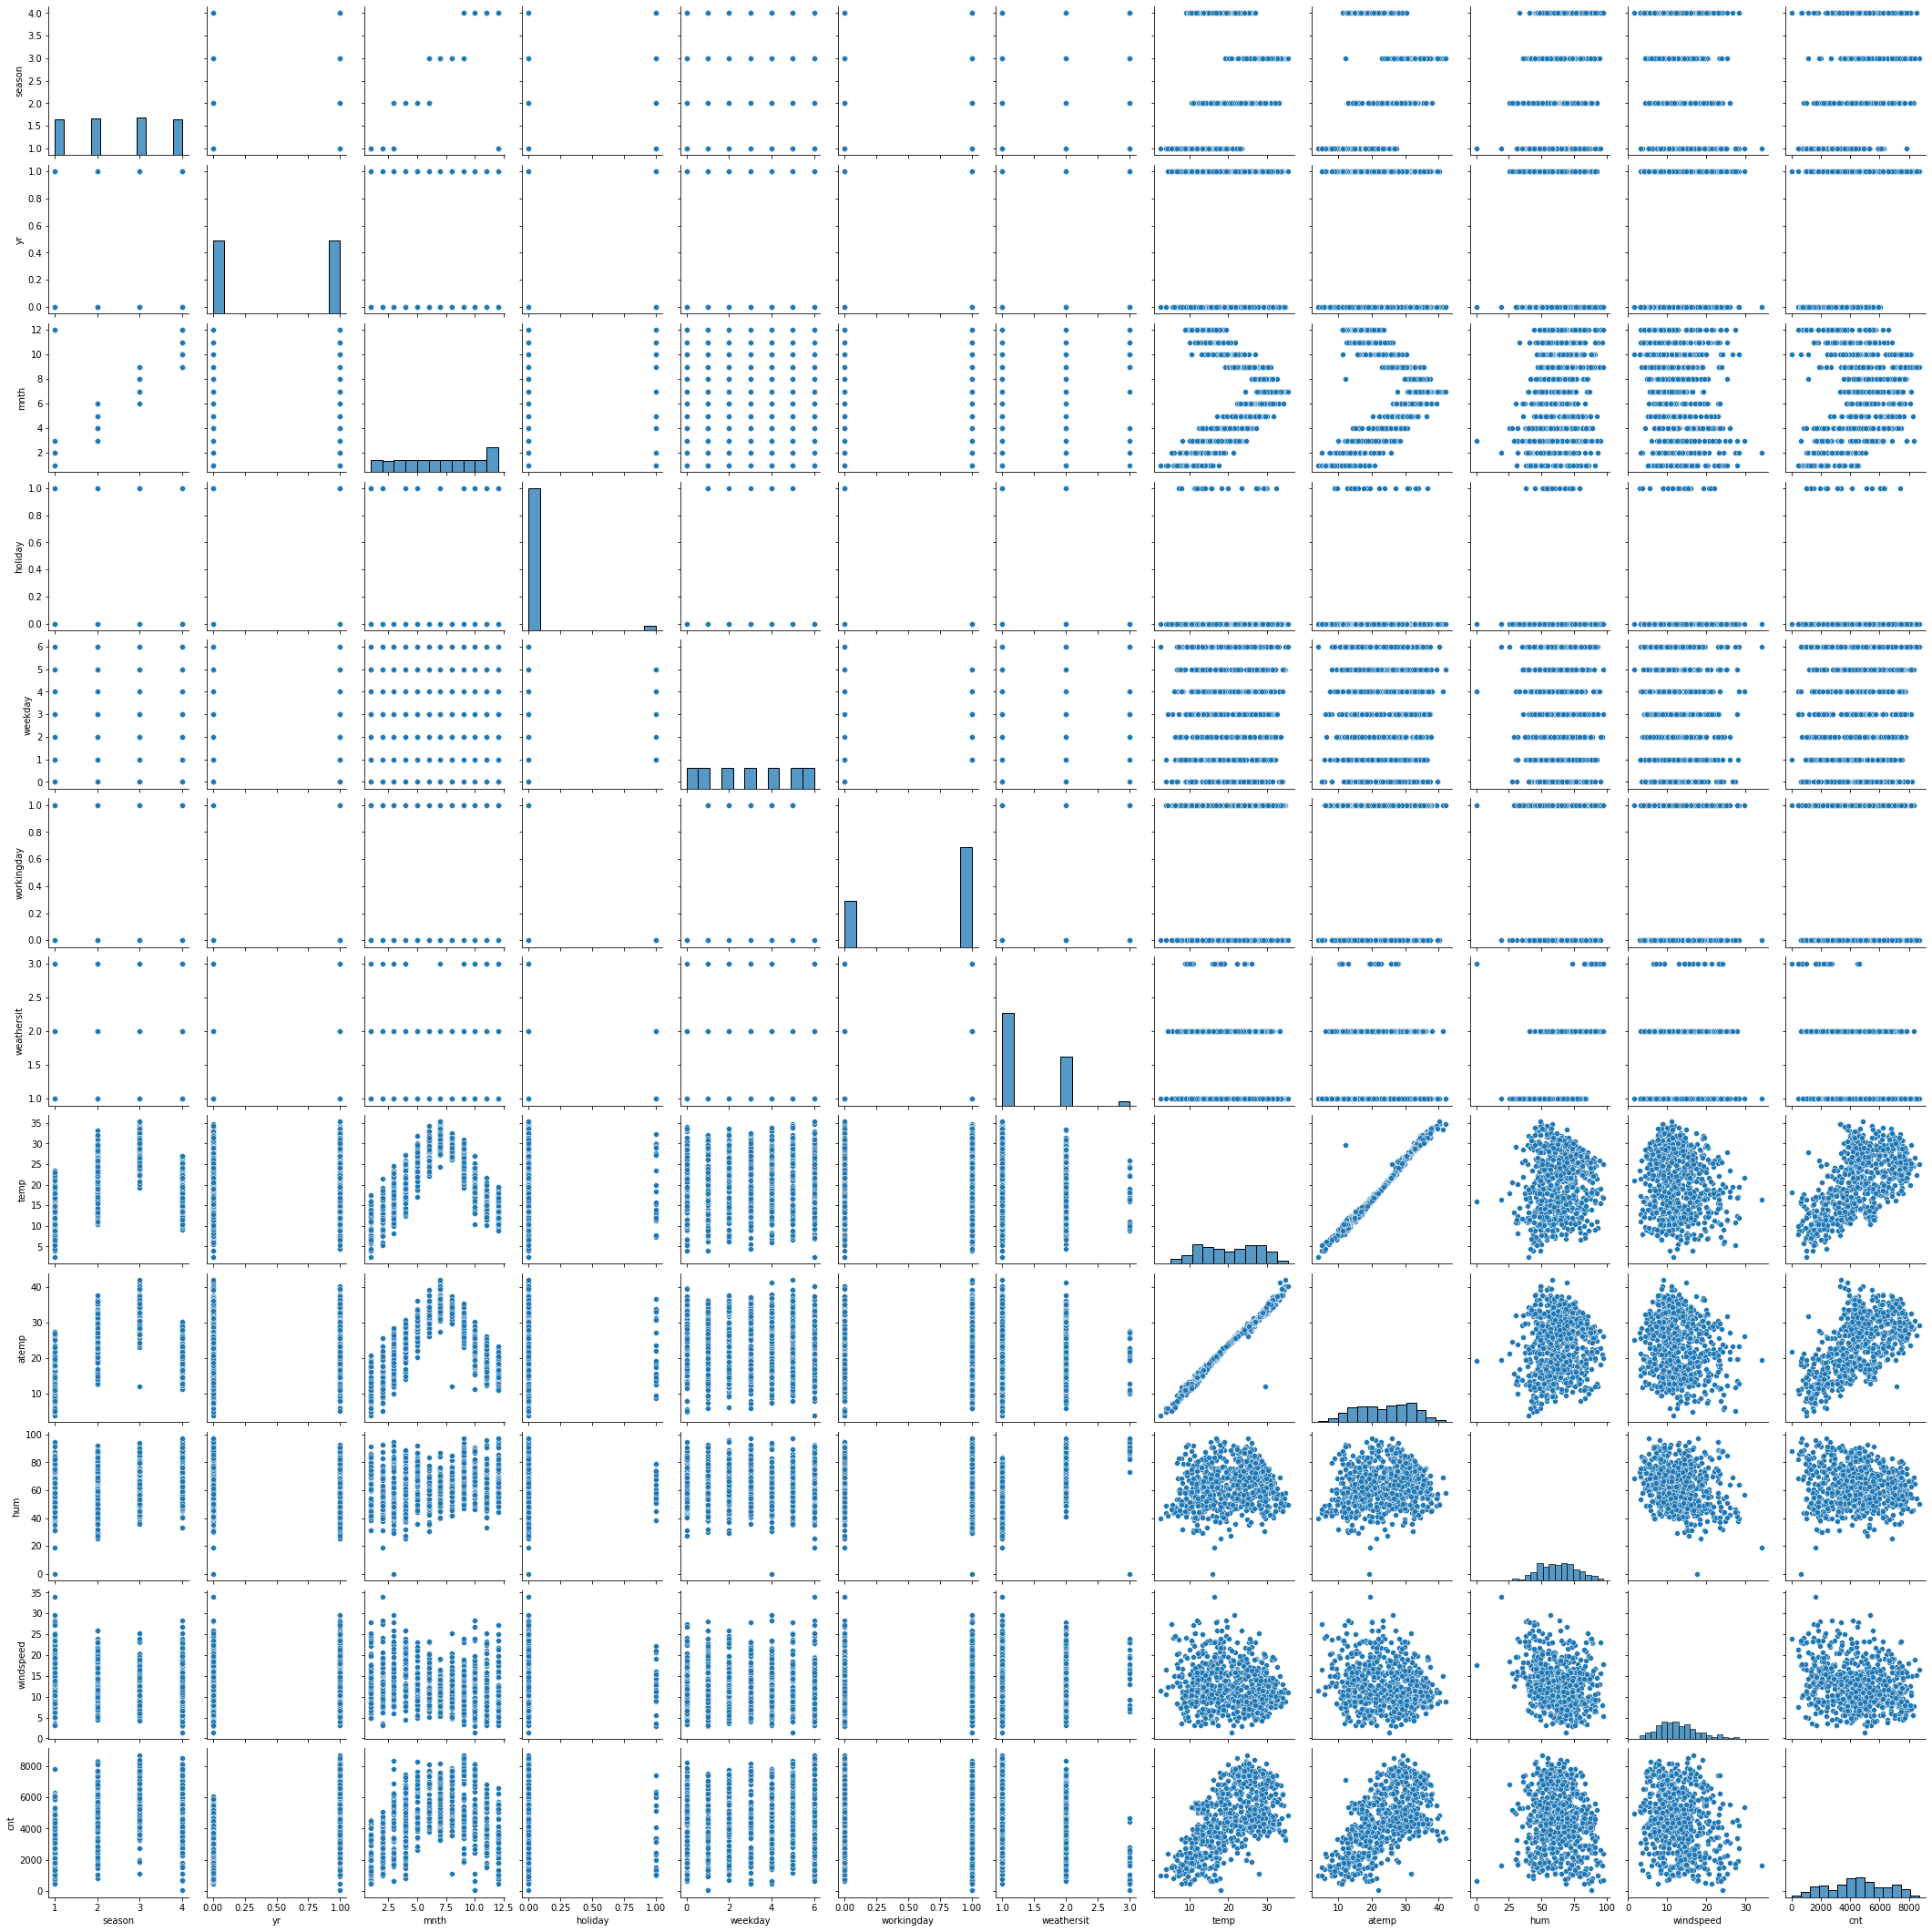

In [8]:
sns.pairplot(data)
plt.show()

# Data Visualization of categorical variables

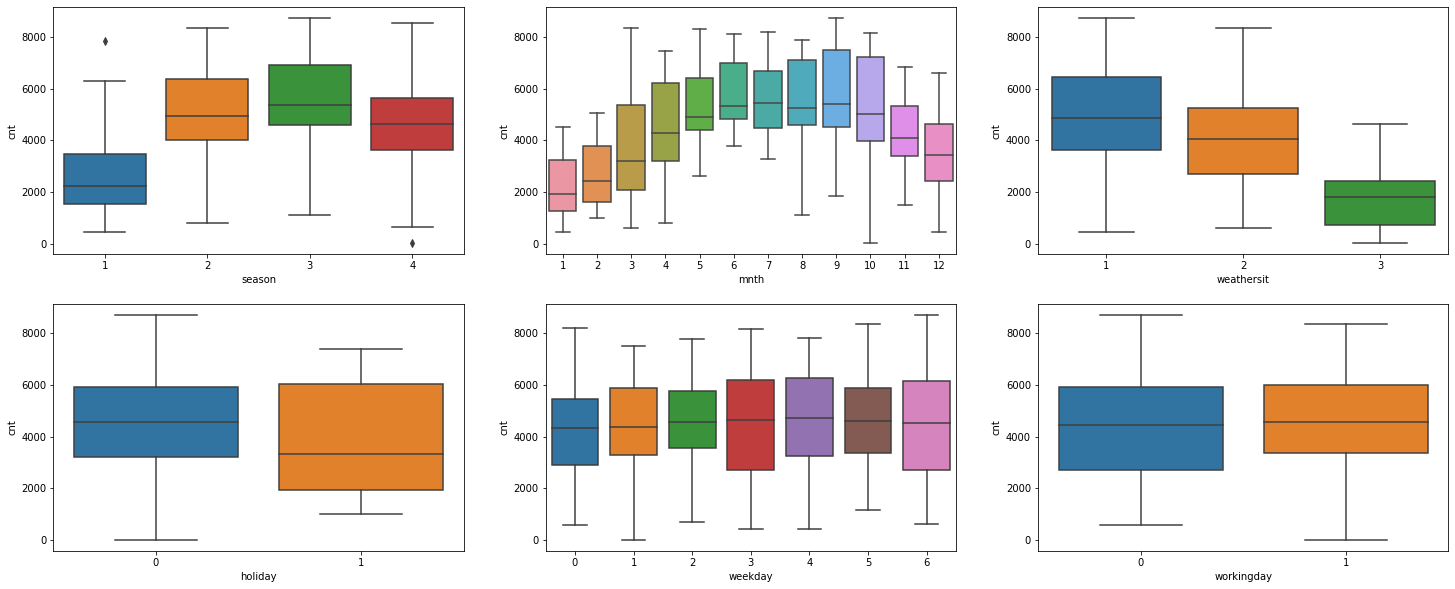

In [9]:

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data=data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data=data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data =data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data=data)
plt.show()

### Insights
season: Maximum bike booking were happening in season3 with a median of over 5000 booking). This was followed by season2 & season4 

mnth:  Most of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. 

weathersit: Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking 

holiday: Most of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend  having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Most of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking. This indicates, workingday can be a good predictor for the dependent variable


# Creating dummy variables for categorical data

#### 'season', 'mnth', 'weekday', 'weathersit' are categorical data but are in numerical form so we will convert these columns into categories

In [10]:
# Convert to 'category' data type
data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [12]:
# creating dummy variables for the categorical data
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Multicollinearity

In [13]:
data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-1.751358e-17,2.208541e-16,...,-2.983215e-17,3.709668e-17,0.003904,-1.950413e-16,-0.003935,-1.086706e-16,-5.819694e-17,-0.003904,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-2.440810e-02,-2.639258e-02,...,6.785194e-02,6.362682e-03,0.279764,-4.670117e-02,-0.046213,-2.325423e-02,-2.325423e-02,-0.070541,-0.018668,-0.029619
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,1.509123e-02,1.677487e-02,...,-1.087082e-02,-1.458882e-02,0.152976,2.688958e-01,0.267305,2.604690e-01,2.604690e-01,-0.602419,0.048877,0.028990
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,1.548756e-01,6.782830e-01,...,-2.066901e-01,-2.856645e-01,-0.004799,1.935952e-02,0.023459,1.949216e-02,-5.003258e-06,-0.030363,-0.096297,-0.058461
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,1.631513e-01,6.557572e-01,...,-1.968773e-01,-2.774839e-01,0.000091,2.204543e-02,0.020842,2.045265e-02,-8.544145e-03,-0.031340,-0.092933,-0.064937
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-2.870035e-03,2.413415e-02,...,-5.837193e-03,8.220022e-02,0.028591,4.061570e-02,0.046059,-5.200348e-02,-3.980893e-02,-0.023310,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,9.742067e-02,-1.398857e-01,...,-2.587339e-02,-5.461552e-02,0.000999,6.961095e-03,-0.014025,5.792278e-03,-2.163260e-02,0.032187,-0.037177,0.117332
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,1.453245e-01,3.459080e-01,...,-4.034360e-02,-1.738782e-01,-0.035991,5.596898e-04,0.014012,3.355106e-02,3.840273e-02,0.009012,-0.170686,-0.240602
season_2,-1.751358e-17,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000e+00,-3.418943e-01,...,-1.737204e-01,-1.768562e-01,0.004803,-1.928926e-03,0.009410,-1.928926e-03,-1.928926e-03,-0.004187,0.040011,-0.043283
season_3,2.208541e-16,-0.026393,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-3.418943e-01,1.000000e+00,...,-1.762453e-01,-1.794266e-01,-0.009294,1.939879e-03,0.004265,1.090261e-02,1.939879e-03,-0.000367,-0.101756,-0.026393


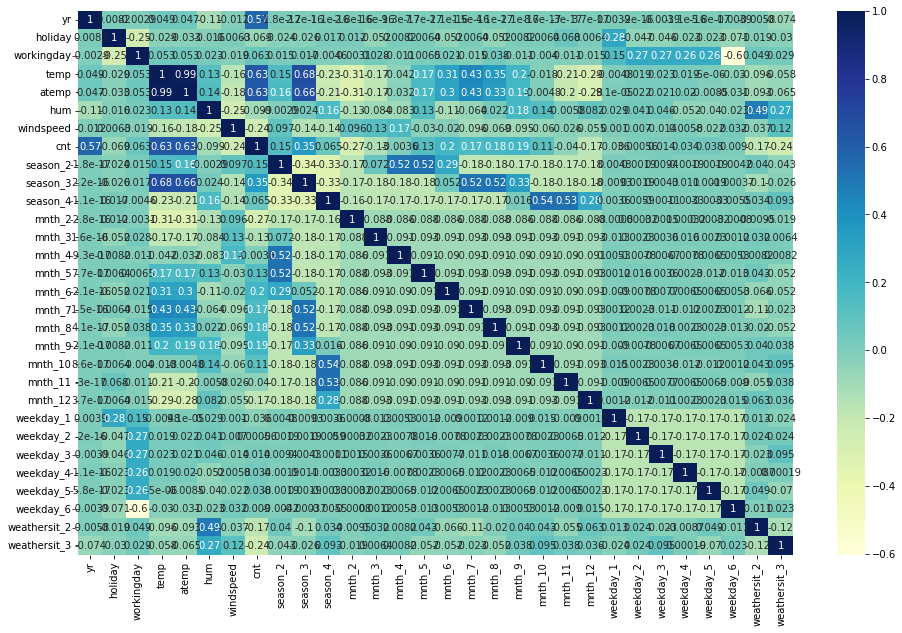

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above we find that 'temp' and 'atemp' column are highly collinear so we can consider only one column among this

In [15]:
# drop atemp
data = data.drop('atemp',axis=1)

In [16]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Spliting the data into train and test

In [17]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 333)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data

In [19]:
# Normalizing the dataset
scaler = MinMaxScaler()

In [20]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [21]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

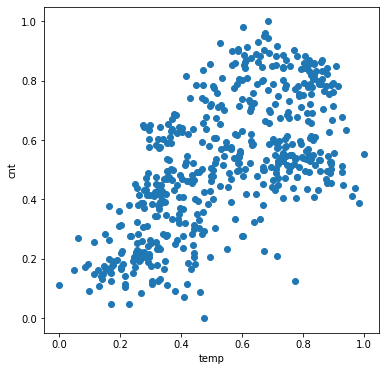

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

# create x_train and y_train

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train


In [24]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Build Model 1 with all the 28 columns

In [25]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Check the parameters obtained
lr1.params

const           0.195890
yr              0.229931
holiday         0.001177
workingday      0.031978
temp            0.451782
hum            -0.170886
windspeed      -0.184784
season_2        0.102273
season_3        0.090103
season_4        0.179714
mnth_2          0.016248
mnth_3          0.067504
mnth_4          0.037864
mnth_5          0.064217
mnth_6          0.040991
mnth_7         -0.000741
mnth_8          0.026401
mnth_9          0.105873
mnth_10         0.045284
mnth_11        -0.021893
mnth_12        -0.012699
weekday_1      -0.016398
weekday_2       0.003112
weekday_3       0.016680
weekday_4       0.012780
weekday_5       0.016981
weekday_6       0.053817
weathersit_2   -0.049765
weathersit_3   -0.270868
dtype: float64

In [27]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.10e-177
Time:                        17:50:29   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     482   BIC:                            -858.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1959      0.031      6.227   

# Check for VIF

In [28]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,weekday_4,inf
1,holiday,inf
2,workingday,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
24,weekday_5,inf
3,temp,45.06
4,hum,21.66
7,season_3,15.51


In [30]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('weekday_4', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.10e-177
Time:                        17:50:29   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     482   BIC:                            -858.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1959      0.031      6.227   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From this we can see there is multicollinearity between the dependent variables

# RFE method

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
X_train = df_train
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15, step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 14),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 4),
 ('weekday_2', False, 8),
 ('weekday_3', False, 5),
 ('weekday_4', False, 7),
 ('weekday_5', False, 6),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
col_list = X_train.columns[rfe.support_]
col_list

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

### From here we can infer the top 15 variable that has linear relation between the target

In [35]:
X_train_rfe= X_train[col_list]

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.97
3,hum,17.34
6,season_3,7.30
4,windspeed,4.67
1,workingday,4.62
5,season_2,3.78
7,season_4,3.06
13,weathersit_2,2.14
0,yr,2.02
12,weekday_6,1.80


# Model 1

In [37]:
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
lr1.params

const           0.201223
yr              0.228613
workingday      0.041065
temp            0.479305
hum            -0.185394
windspeed      -0.184415
season_2        0.124452
season_3        0.085180
season_4        0.156347
mnth_3          0.050770
mnth_5          0.026235
mnth_9          0.100481
mnth_10         0.055932
weekday_6       0.054985
weathersit_2   -0.046611
weathersit_3   -0.268616
dtype: float64

In [39]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.67e-187
Time:                        17:50:30   Log-Likelihood:                 510.31
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     494   BIC:                            -920.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2012      0.030      6.761   

# Model 2

Even though temp has high VIF its an important feature in prediction so we can remove hum which is second highest

In [40]:
X_train_rfe= X_train_rfe.drop('hum',axis=1)

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,17.95
5,season_3,7.08
3,windspeed,4.36
1,workingday,4.12
4,season_2,3.75
6,season_4,2.94
0,yr,2.02
8,mnth_5,1.75
10,mnth_10,1.66
11,weekday_6,1.66


In [42]:
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.63e-183
Time:                        17:50:30   Log-Likelihood:                 498.05
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     495   BIC:                            -902.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0919      0.020      4.522   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Since season_3 has high VIF we will remove it

# Model 3

In [43]:
X_train_rfe= X_train_rfe.drop('season_3',axis=1)

In [44]:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.00
3,windspeed,4.20
1,workingday,4.08
4,season_2,2.17
0,yr,2.01
5,season_4,1.98
7,mnth_5,1.67
10,weekday_6,1.66
9,mnth_10,1.63
11,weathersit_2,1.54


In [45]:
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.24e-180
Time:                        17:50:30   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -949.8
Df Residuals:                     496   BIC:                            -890.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0768      0.020      3.773   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Model 4

### Since mnth_5 has high VIF and p-value hence removing it

In [46]:
X_train_rfe= X_train_rfe.drop('mnth_5',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [47]:
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.56e-181
Time:                        17:50:30   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Model 5

### mnth_3 has high VIF hence dropping it

In [48]:
X_train_rfe= X_train_rfe.drop('mnth_3',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.84
3,windspeed,4.06
1,workingday,4.01
0,yr,2.01
5,season_4,1.94
8,weekday_6,1.65
7,mnth_10,1.63
4,season_2,1.56
9,weathersit_2,1.53
6,mnth_9,1.23


In [49]:
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.05e-181
Time:                        17:50:30   Log-Likelihood:                 485.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     498   BIC:                            -895.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0866      0.020      4.301   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Model 6

### mnth_10 has high p-value hence removing it

In [50]:
X_train_rfe= X_train_rfe.drop('mnth_10',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [51]:
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.77e-181
Time:                        17:50:30   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Final model coefficients

In [52]:
lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

### Hypothesis Testing
Hypothesis testing states that coefficients are zero
here coeffiecients are not equal to zero
Hence rejecting null hypothesis


# Assumption 1

## Linear relationship between dependent and independent variable

<Figure size 144x144 with 0 Axes>

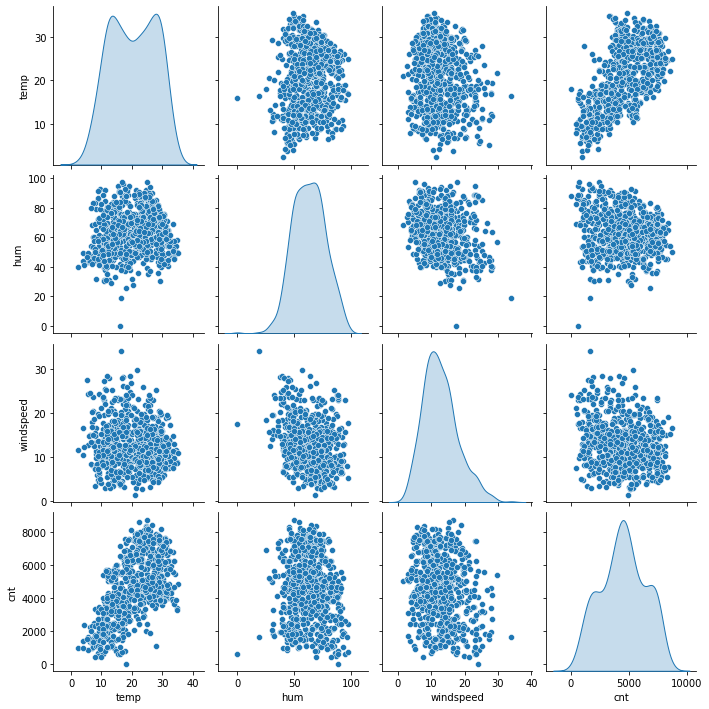

In [53]:
data=data[[ 'temp', 'hum', 'windspeed','cnt']]
plt.figure(figsize=(2,2))
sns.pairplot(data, diag_kind='kde')
plt.show()

### From the above plot we can infer there is linear relation between independent (temp, hum, windspeed) variable and dependent (cnt) variable

# Assumption 2

## Little or no Multicollinearity between the features

In [54]:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


### from this we find the VIF value is less than 5 hence no multicollinearity

# Assumption 3 and 4

## Homoscedasticity Assumption and Normal distribution of error terms

In [55]:
y_train_pred = lr6.predict(X_train_lm6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


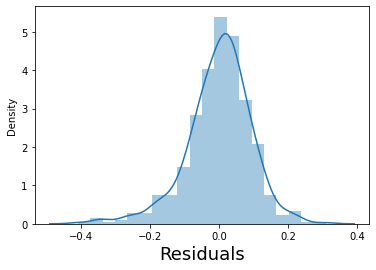

In [56]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
plt.xlabel('Residuals', fontsize = 18)        
plt.show()     

Here error term is normally distributed and the mean is zero. Hence assumption is satisfied 

The fourth assumption is that the error(residuals) follow a normal distribution. 
 
This is the Residual plot obtained from the final model. Here it shows the normal distribution and it satisfies the assumption


# Assumption 5
## Durbin-Watson is 2.028 
id Durbin-Watson is close to 2 then there is no auto correlation. Hence assumption is statisfied

# Test data

In [57]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_3      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_2        219 non-null    uint8  
 10  mnth_3        219 non-null    uint8  
 11  mnth_4        219 non-null    uint8  
 12  mnth_5        219 non-null    uint8  
 13  mnth_6        219 non-null    uint8  
 14  mnth_7        219 non-null    uint8  
 15  mnth_8        219 non-null    uint8  
 16  mnth_9        219 non-null    uint8  
 17  mnth_10       219 non-null    uint8  
 18  mnth_11       219 non-null   

In [59]:
feature_list=list(X_train_rfe)

In [60]:
#Selecting the variables that were part of final model.
X_test=X_test[feature_list]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Prediction

In [61]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

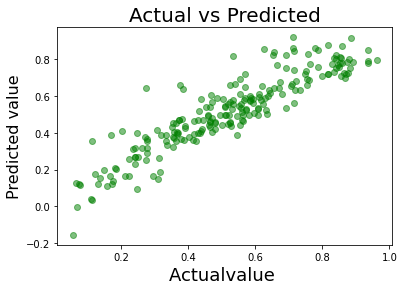

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5, color='green')
plt.title('Actual vs Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('Actualvalue ', fontsize = 18)                          # X-label
plt.ylabel('Predicted value', fontsize = 16) 
plt.show()


# R2 score

In [63]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8203092200749709

# Adjusted R square

In [64]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.811670240270883